<ipython-input-13-8858aef7956a>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


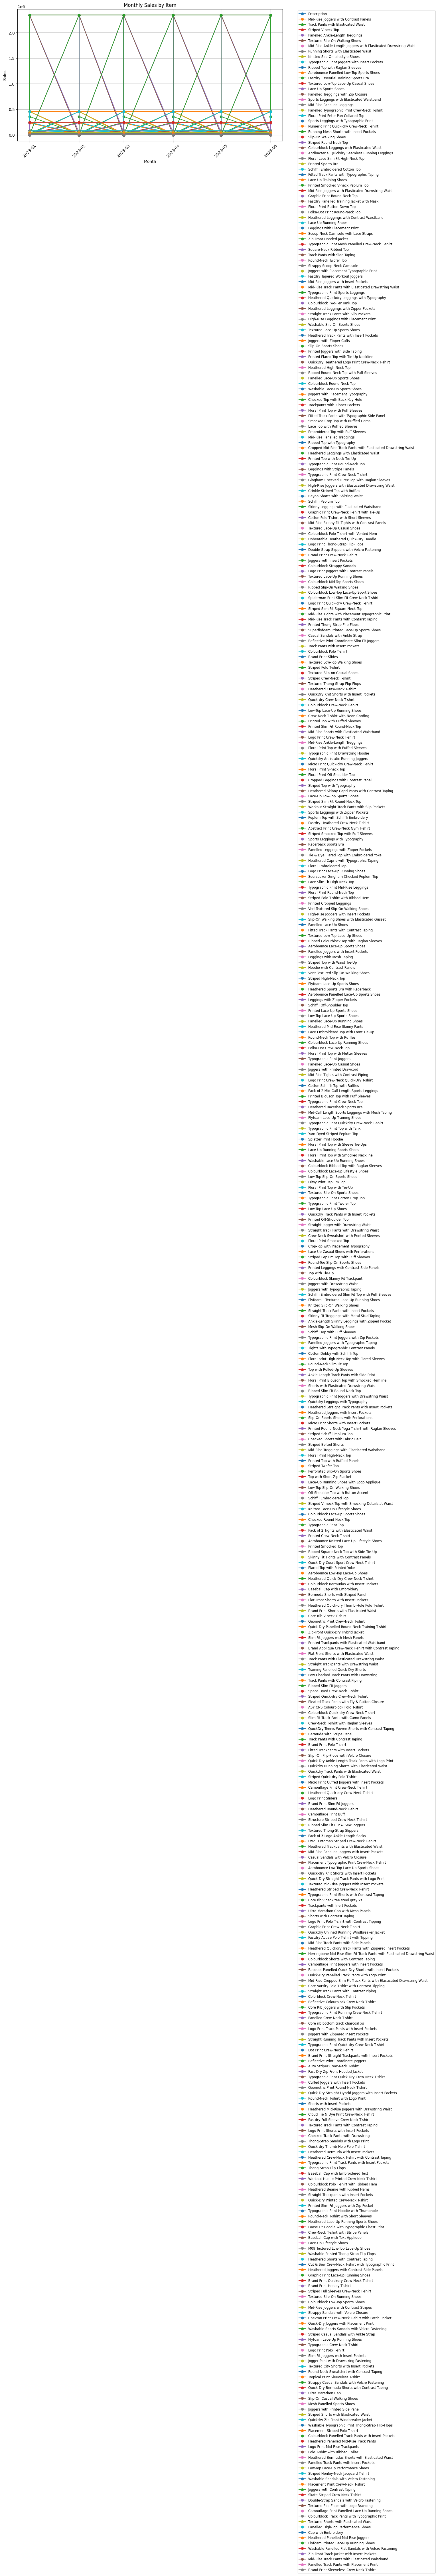

Items with the highest sales each month:
          Month                  Item    Sales
607  2023-01-01  Lace-Up Sports Shoes  2344345
1506 2023-02-01  Lace-Up Sports Shoes  2344325
2405 2023-03-01  Lace-Up Sports Shoes  2344381
3304 2023-04-01  Lace-Up Sports Shoes  2344364
4203 2023-05-01  Lace-Up Sports Shoes  2344428
5102 2023-06-01  Lace-Up Sports Shoes  2344396

Prediction for next month:
Item with the highest predicted sales: Lace Slim Fit High-Neck Top
Predicted sales value: 2344427.72


In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import logging

logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('prophet').setLevel(logging.WARNING)

# Load data from CSV
data = pd.read_csv('/content/codevogue - Sheet1.csv')

# Assuming your CSV has columns like 'Item', 'Brand', 'Sex', 'Jan', 'Feb', 'March', 'April', 'May', 'June'
df = pd.DataFrame(data)

# Mapping dictionary for month names
month_mapping = {
    'Jan': 'January',
    'Feb': 'February',
    'March': 'March',
    'April': 'April',
    'May': 'May',
    'June': 'June'
}

# Melt the dataframe
df_long = pd.melt(df, id_vars=['Item', 'Brand', 'Sex'], var_name='Month', value_name='Sales')

# Map abbreviated month names to full names
df_long['Month'] = df_long['Month'].map(month_mapping)

# Convert 'Month' column to datetime with a standard year (e.g., 2023)
df_long['Month'] = pd.to_datetime(df_long['Month'] + ' 2023', format='%B %Y')

# Sort values by 'Month' to ensure the data is in chronological order
df_long.sort_values(by='Month', inplace=True)

# Plot sales data
plt.figure(figsize=(12, 6))
for item in df_long['Item'].unique():
    item_data = df_long[df_long['Item'] == item]
    plt.plot(item_data['Month'], item_data['Sales'], marker='o', linestyle='-', label=item)
plt.title('Monthly Sales by Item')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Find the item with maximum sales each month
max_sales_per_month = df_long.loc[df_long.groupby('Month')['Sales'].idxmax()]

# Display the items with the highest sales each month
print("Items with the highest sales each month:")
print(max_sales_per_month[['Month', 'Item', 'Sales']])

# Prepare data for Prophet for each item
item_forecasts = {}
for item in df_long['Item'].unique():
    item_data = df_long[df_long['Item'] == item][['Month', 'Sales']].rename(columns={'Month': 'ds', 'Sales': 'y'})
    model = Prophet()
    model.fit(item_data)
    future = model.make_future_dataframe(periods=1, freq='M')
    forecast = model.predict(future)
    item_forecasts[item] = forecast['yhat'].iloc[-1]

# Find the item with the highest predicted sales for next month
predicted_max_item = max(item_forecasts, key=item_forecasts.get)
predicted_max_sales = item_forecasts[predicted_max_item]

print(f"\nPrediction for next month:")
print(f"Item with the highest predicted sales: {predicted_max_item}")
print(f"Predicted sales value: {predicted_max_sales:.2f}")
